# TESLA Stock Prediction 

## Data Pre processing 

### Loading the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('TESLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-06-2010,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,01-07-2010,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,02-07-2010,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,06-07-2010,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,07-07-2010,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2574,21-09-2020,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,22-09-2020,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,23-09-2020,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,24-09-2020,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


In [3]:
df.shape

(2579, 7)

In [4]:
list(df.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [5]:
# checking for null values
df.isnull().sum()

Date          0
Open          0
High          3
Low           1
Close        16
Adj Close     0
Volume        0
dtype: int64

### Handling the missing data

In [6]:
df1 = df.copy()

### Using forward fill(ffill) and backward fill(bfill) methods to handle the missing values

In [7]:
df1['Close'].fillna(method = 'ffill',inplace = True)
df1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-06-2010,5.158,6.084,4.660,4.766,4.766,85935500
1,01-07-2010,5.000,5.184,4.054,4.392,4.392,41094000
2,02-07-2010,4.600,4.620,3.742,3.840,3.840,25699000
3,06-07-2010,4.000,4.000,3.166,3.222,3.222,34334500
4,07-07-2010,3.280,3.326,2.996,3.160,3.160,34608500


In [8]:
df1['High'].fillna(method = 'bfill',inplace = True)
df1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-06-2010,5.158,6.084,4.660,4.766,4.766,85935500
1,01-07-2010,5.000,5.184,4.054,4.392,4.392,41094000
2,02-07-2010,4.600,4.620,3.742,3.840,3.840,25699000
3,06-07-2010,4.000,4.000,3.166,3.222,3.222,34334500
4,07-07-2010,3.280,3.326,2.996,3.160,3.160,34608500


### Droping a missing value row from the dataset

In [9]:
df1.dropna(axis=0,inplace=True)
df1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-06-2010,5.158,6.084,4.660,4.766,4.766,85935500
1,01-07-2010,5.000,5.184,4.054,4.392,4.392,41094000
2,02-07-2010,4.600,4.620,3.742,3.840,3.840,25699000
3,06-07-2010,4.000,4.000,3.166,3.222,3.222,34334500
4,07-07-2010,3.280,3.326,2.996,3.160,3.160,34608500


In [10]:
df1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2.578000e+03
mean,49.223318,50.318884,48.089339,49.269635,49.269925,3.079309e+07
std,57.939183,59.893721,55.857108,58.125128,58.124909,2.855732e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.175000,7.279500,6.990500,7.190500,7.190500,1.052762e+07
50%,44.015999,44.667999,43.314999,43.924000,43.924000,2.413700e+07
75%,59.339500,60.172500,57.841499,59.030001,59.030001,3.981350e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2578 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2578 non-null   object 
 1   Open       2578 non-null   float64
 2   High       2578 non-null   float64
 3   Low        2578 non-null   float64
 4   Close      2578 non-null   float64
 5   Adj Close  2578 non-null   float64
 6   Volume     2578 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.1+ KB


### Removing the Unwanted data (Data Reduction)

In [13]:
df1=df1.drop(['Date'], axis=1)
df1

,Open,High,Low,Close,Adj Close,Volume
0,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...
2574,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


### Removing Outliers from the data

In [14]:
from scipy import stats
z = np.abs(stats.zscore(df1))
z

array([[0.7606919 , 0.73869958, 0.77765868, 0.76580078, 0.76580866,
        1.93131224],
       [0.76341943, 0.75372911, 0.78850989, 0.77223642, 0.77224432,
        0.36077986],
       [0.77032456, 0.76314762, 0.79409666, 0.78173502, 0.78174296,
        0.17841589],
       ...,
       [6.14447292, 6.04239146, 5.86951728, 5.69727058, 5.69728706,
        2.25138682],
       [5.43048218, 5.83114314, 5.42938017, 5.82512347, 5.82514043,
        2.30346413],
       [5.94267044, 5.98527953, 6.14563209, 6.16153184, 6.16155007,
        1.27050938]])

In [15]:
threshold = 4
print(np.where(z > 4))

(array([ 721,  764,  844,  918, 2039, 2076, 2345, 2346, 2396, 2405, 2411,
       2413, 2414, 2415, 2416, 2462, 2475, 2520, 2521, 2523, 2523, 2523,
       2523, 2524, 2524, 2524, 2524, 2524, 2524, 2525, 2525, 2525, 2525,
       2525, 2526, 2526, 2526, 2526, 2526, 2527, 2527, 2527, 2527, 2527,
       2528, 2528, 2528, 2528, 2528, 2529, 2529, 2529, 2529, 2529, 2530,
       2530, 2530, 2530, 2530, 2531, 2531, 2531, 2531, 2531, 2532, 2532,
       2532, 2532, 2532, 2533, 2533, 2533, 2533, 2533, 2534, 2534, 2534,
       2534, 2534, 2535, 2535, 2535, 2535, 2535, 2536, 2536, 2536, 2536,
       2536, 2537, 2537, 2537, 2537, 2537, 2538, 2538, 2538, 2538, 2538,
       2539, 2539, 2539, 2539, 2539, 2540, 2540, 2540, 2540, 2540, 2541,
       2541, 2541, 2541, 2541, 2542, 2542, 2542, 2542, 2542, 2543, 2543,
       2543, 2543, 2543, 2544, 2544, 2544, 2544, 2544, 2545, 2546, 2546,
       2546, 2546, 2546, 2547, 2547, 2547, 2547, 2547, 2548, 2548, 2548,
       2548, 2548, 2549, 2549, 2549, 2549, 2549, 2

In [16]:
z[722][4]

0.5558407207564203

### Bin method to smooth the data

In [17]:
min_val=df1['Open'].min()
max_val=df1['Open'].max()

In [18]:
bins = np.linspace(min_val,max_val,50)
labels = bins[1:]

In [19]:
df1['Open_bin']=pd.cut(df1['Open'],bins=bins,labels=labels,include_lowest=True)
df1.head(5)

,Open,High,Low,Close,Adj Close,Volume,Open_bin
0,5.158,6.084,4.660,4.766,4.766,85935500,13.409878
1,5.000,5.184,4.054,4.392,4.392,41094000,13.409878
2,4.600,4.620,3.742,3.840,3.840,25699000,13.409878
3,4.000,4.000,3.166,3.222,3.222,34334500,13.409878
4,3.280,3.326,2.996,3.160,3.160,34608500,13.409878


### Plotting Heat map

<AxesSubplot:>

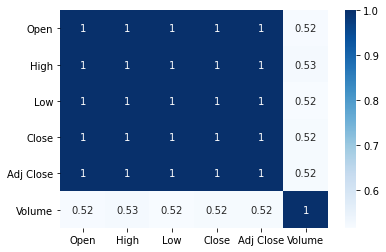

In [20]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,cmap="Blues")

### Plotting pair plots

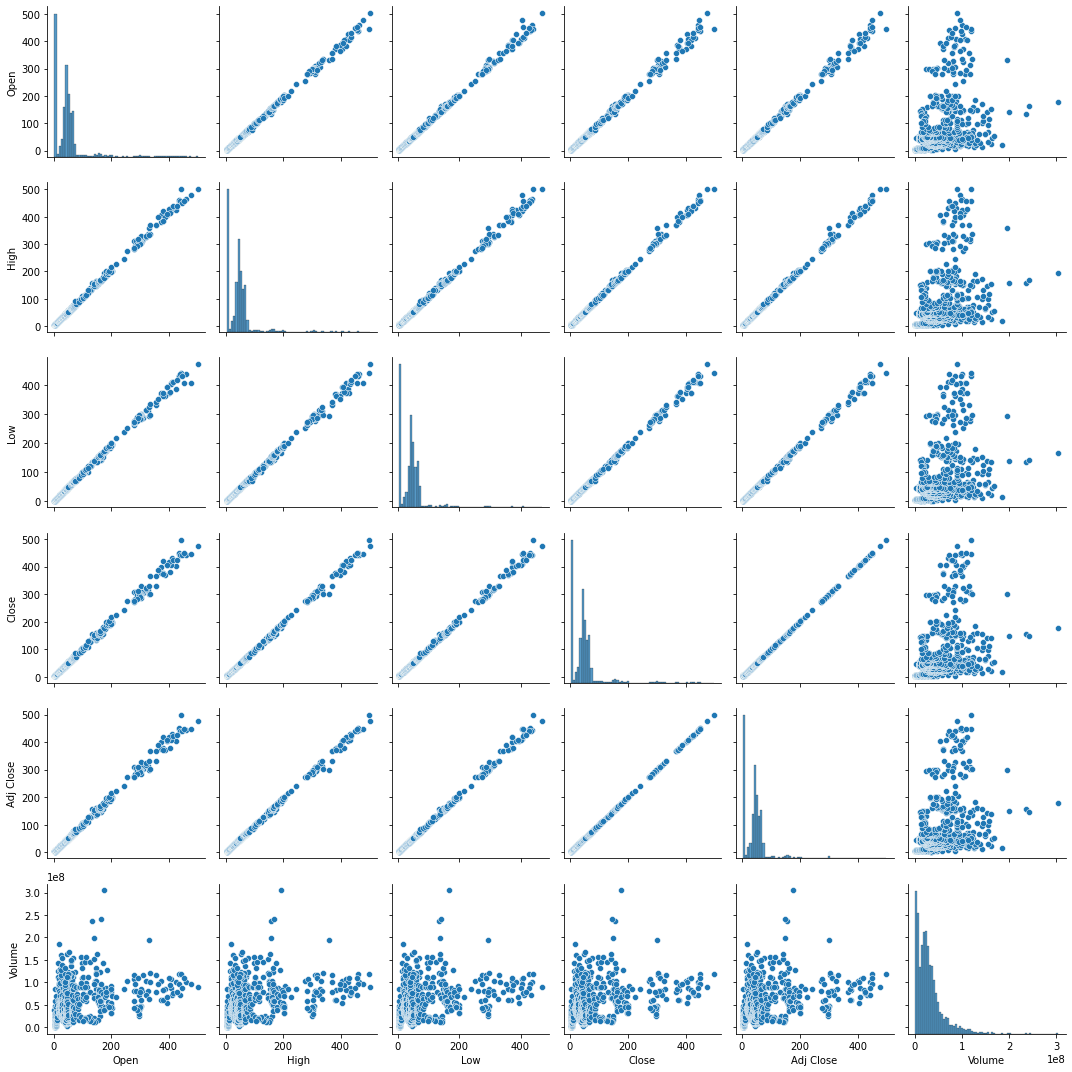

In [21]:
import matplotlib.pyplot as plt
sns.pairplot(df1)
plt.tight_layout()

### Model Training 

### Splitting data into test and train

In [22]:
X = df1[['High','Low','Open','Volume']].values
y = df1['Close'].values

In [23]:
X

array([[6.08400000e+00, 4.66000000e+00, 5.15800000e+00, 8.59355000e+07],
       [5.18400000e+00, 4.05400000e+00, 5.00000000e+00, 4.10940000e+07],
       [4.62000000e+00, 3.74200000e+00, 4.60000000e+00, 2.56990000e+07],
       ...,
       [4.12149994e+02, 3.75880005e+02, 4.05160004e+02, 9.50742000e+07],
       [3.99500000e+02, 3.51299988e+02, 3.63799988e+02, 9.65611000e+07],
       [4.08730011e+02, 3.91299988e+02, 3.93470001e+02, 6.70684000e+07]])

In [24]:
y

array([  4.766   ,   4.392   ,   3.84    , ..., 380.359985, 387.790009,
       407.339996])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

### Applying Linear regression model 

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
print(regressor.coef_)

[ 8.86529434e-01  5.90674943e-01 -4.80488089e-01 -9.12309553e-09]


In [30]:
print(regressor.intercept_)

0.18305890812803938


In [31]:
predicted = regressor.predict(X_test)

In [32]:
print(predicted)

[ 37.47880929   5.38807108  34.50880414   6.63598077  46.11418883
  40.76209273  40.97394457  24.21181854  50.74840802  43.01086546
  42.37561648  38.92521974   6.97404288  43.92933482  54.54841911
   4.63582001  49.53543886  62.25558536   6.5381177   50.87690464
 162.24133816  77.99593083  24.27468256  17.50881428  67.52839045
  44.83030713  72.84314906  49.06348178  74.30292517  40.36710847
  50.69504816  29.41066589  52.14957192  47.6289346   34.35211649
  42.03609716  62.70286916   4.33418518  69.56965268  27.583481
  70.82663997  38.24743374  31.23889337  37.86178757  24.83811587
  39.15531042   3.43780217  39.68734374   7.59546828  51.70322833
   3.94365477   5.87377427   3.00958035  40.98947186  50.87890254
   7.31026091   7.27879561  50.02336588 449.69287717   8.44143851
 130.87623197  47.09748832  70.11110321  41.81836048  69.90096233
  55.78132463 126.84015587  64.01681455  48.65375992  67.92636612
   4.96917532 155.00578391  40.66018723  58.69752658   6.81353267
  35.9652110

In [33]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [34]:
data1.head(20)

,Actual,Predicted
0,36.903999,37.478809
1,5.278000,5.388071
2,35.066002,34.508804
3,6.454000,6.635981
4,45.816002,46.114189
5,41.080002,40.762093
6,40.807999,40.973945
7,24.454000,24.211819
8,50.478001,50.748408
9,43.495998,43.010865


In [35]:
from sklearn import preprocessing
from sklearn import metrics

### Calculating the Accuracy and Errors

In [37]:
from sklearn.metrics import r2_score
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, predicted.flatten())))

Accuracy score of the predictions: 0.999700595009277


In [38]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.4513383670769388
Mean Squared Error: 0.8312963055576927
Root Mean Squared Error: 0.9117545204481812


In [39]:
graph = data1.head(20)

### Plotting bar graph for the actual values vs predicted values

<AxesSubplot:>

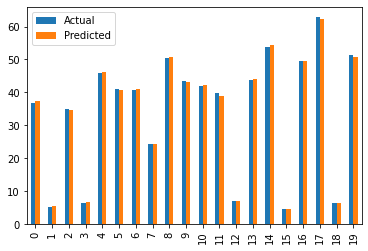

In [40]:
graph.plot(kind='bar')